Suppose the course grade is based on 28 assignments (each scored 0 to 100), 2 quizzes (each scored 0 to 40), three projects (each scored 0 to 100), and attendance in 15 classes (each scored as present or absent). The assignments+quizzes account for 30% of the course grade, the projects are 20. each (60% total), and attendance is 10% of the course grade. Suppose 10 of the (28 assignments+2 quizzes) are included in the final course score. The 10 are randomly selected. Letter grades are defined in the syllabus​.

Use your (known) project scores, attendance, quiz scores, and assignment scores. Use your guess for your scores for the remaining home works and project. Simulate selecting randomly 10 assignment scores to get your course score (in percentage points). Repeat the simulation 1000 times (each with a different random selection of assignments). Submit a notebook that performs this simulation and address the following objectives:

Use a histogram to plot the distribution of your numeric course score for the 1000 simulated outcomes.
What is the maximum course score, minimum course score, and average course score?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#setting seed 
np.random.seed(0)

#constants for grading
NUM_ASSIGNMENTS = 28
NUM_QUIZZES = 2
NUM_PROJECTS = 3
NUM_CLASSES = 15
NUM_SIMULATIONS = 1000

In [3]:
#data for scores 
assignment_scores = np.random.randint(60, 100, NUM_ASSIGNMENTS)  #assignment scores between 60 and 100
quiz_scores = np.random.randint(25, 40, NUM_QUIZZES)  #quiz scores between 25 and 40
project_scores = np.random.randint(70, 100, NUM_PROJECTS)  #project scores between 70 and 100
attendance_scores = np.random.choice([1, 0], NUM_CLASSES, p=[0.9, 0.1])  #attendance with 90% presence rate

#grade weights 
assignment_quiz_weight = 0.3
project_weight = 0.6
attendance_weight = 0.1

In [6]:
#list to store the simulation of course scores
course_scores = []

#calculating averages 
for _ in range(NUM_SIMULATIONS):
    #randomly select 10 out of the 28 assignments and 2 quizzes
    selected_assignments = np.random.choice(assignment_scores, 10, replace=False)
    selected_quizzes = quiz_scores

    #average for assignments and quizzes
    assignment_quiz_avg = np.mean(np.concatenate([selected_assignments, selected_quizzes]))

    #average project score
    project_avg = np.mean(project_scores)

    #average attendance score as a percentage
    attendance_avg = np.mean(attendance_scores) * 100

    #calculate the course grade based on weights 
    course_grade = (assignment_quiz_avg * assignment_quiz_weight +
                    project_avg * project_weight +
                    attendance_avg * attendance_weight)
    
    course_scores.append(course_grade)

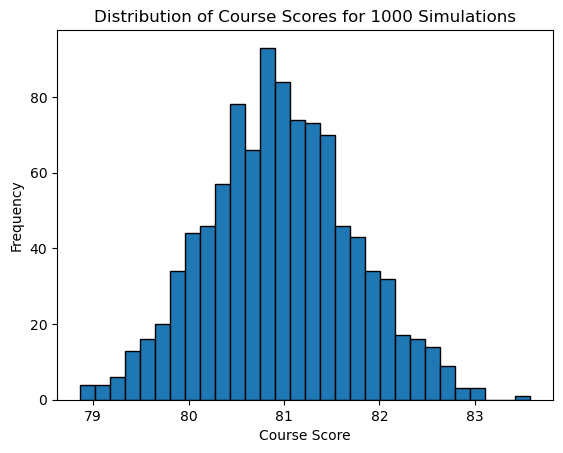

Min Score:78.85833333333333
Max Score:83.58333333333333
Average Score:80.95943333333334


In [8]:
#convert to numpy array for easier calculations
course_scores = np.array(course_scores)

#calculate min, max, and average of the course scores
min_score = course_scores.min()
max_score = course_scores.max()
avg_score = course_scores.mean()

#plot histogram of course scores
plt.hist(course_scores, bins=30, edgecolor='black')
plt.xlabel("Course Score")
plt.ylabel("Frequency")
plt.title("Distribution of Course Scores for 1000 Simulations")
plt.show()

print("Min Score:" + str(min_score))
print("Max Score:" + str(max_score))
print("Average Score:" + str(avg_score)) 